<a href="https://colab.research.google.com/github/amerajat/AI07-Heart-Disease/blob/main/Copy_of_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting the data
The data set we are using is a patient medical records that have a heart disease or not. The dataset is from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset.

In [ ]:
import pandas as pd
heart_disease = pd.read_csv('/content/drive/MyDrive/heart_disease/heart.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Total samples
len(heart_disease)

1025

In [ ]:
#find null value
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#Split the Data
in order for the model to learn, need to split data into train and test data. 

In [ ]:
#Split data into features and label
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
y.value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
# Split data into training dataset and test dataset
from sklearn.model_selection import train_test_split
# Setup random seed
SEED=42
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3,random_state=SEED)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((717, 13), (308, 13), (717,), (308,))

# Build a neural network model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses, applications
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard


In [ ]:
model = keras.Sequential()
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(x_train)
model.add(normalizer)

In [ ]:
number_input = x_train.shape[-1]
number_output = y_train.shape[-1]
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=number_input)) 
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 42,113
Trainable params: 42,113
Non-trainable params: 0
_________________________________________________________________


#Compile the model and train the model

In [ ]:
BATCH_SIZE = 32
EPOCHS = 300

model.compile(optimizer='adam',
              loss=losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)


Epoch 1/300
23/23 [==============================] - 7s 31ms/step - loss: 1.1978 - accuracy: 0.5858 - val_loss: 0.7114 - val_accuracy: 0.6364
Epoch 2/300
23/23 [==============================] - 0s 10ms/step - loss: 0.6347 - accuracy: 0.6667 - val_loss: 0.6226 - val_accuracy: 0.6981
Epoch 3/300
23/23 [==============================] - 0s 7ms/step - loss: 0.6289 - accuracy: 0.6750 - val_loss: 0.5550 - val_accuracy: 0.6981
Epoch 4/300
23/23 [==============================] - 0s 8ms/step - loss: 0.5634 - accuracy: 0.6834 - val_loss: 0.8491 - val_accuracy: 0.6266
Epoch 5/300
23/23 [==============================] - 0s 11ms/step - loss: 0.5613 - accuracy: 0.6904 - val_loss: 0.5402 - val_accuracy: 0.7013
Epoch 6/300
23/23 [==============================] - 0s 8ms/step - loss: 0.5265 - accuracy: 0.7225 - val_loss: 0.5292 - val_accuracy: 0.6656
Epoch 7/300
23/23 [==============================] - 0s 8ms/step - loss: 0.4814 - accuracy: 0.7573 - val_loss: 0.7018 - val_accuracy: 0.7435
Epoch 8/30

In [ ]:
test_result = model.evaluate( x_test, y_test, batch_size = BATCH_SIZE)
print(f"Test loss = {test_result[0]}")
print(f"Test accuracy = {test_result[1]}")

10/10 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9545
Test loss = 0.1825311779975891
Test accuracy = 0.9545454382896423


# Visualize

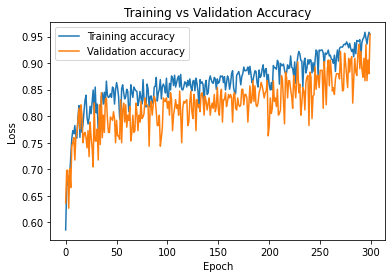

<Figure size 432x288 with 0 Axes>

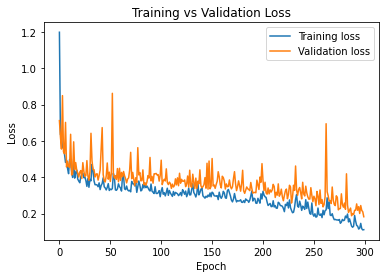

<Figure size 432x288 with 0 Axes>

In [ ]:
#%% visualize
import matplotlib.pyplot as plt


plot_model(model, show_layer_activations=True)
epochs_x_axis = history.epoch

plt.plot(epochs_x_axis, history.history['accuracy'],
         label='Training accuracy')
plt.plot(epochs_x_axis, history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs_x_axis, history.history['loss'],
         label='Training loss')
plt.plot(epochs_x_axis, history.history['val_loss'],
         label='Validation loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()